In [ ]:
# Resolver mediante una simulación con python el problema de Monty Hall.
# https://colab.research.google.com/github/deeplearning-itba/Monti-Hall/blob/master/Monty_Hall_solucion_parcial.ipynb
# https://colab.research.google.com/github/deeplearning-itba/Monti-Hall/blob/master/Monty_Hall_solucion.ipynb

In [3]:
import numpy as np

In [68]:
N = 200000 # Cantidad de simulaciones

win_with_nochange = 0 # Cantidad de veces que me llevo el auto sin cambiar de puerta
win_with_change = 0 # Cantidad de veces que me llevo el auto cambiando de puerta
rand_sel = 0 # Cantidad de veces que me llevo el auto eligiendo al azar entre las dos puertas restantes

doors_general = [0,1,2]
quantity_doors = len(doors_general)
# Hits acumulados
change_acum = []
no_change_acum = []
rand_sel_acum = []

for i in range(N):
  # Ubicación del auto (una de las 3 puertas al azar)
  car_pos = np.random.randint(quantity_doors)
  #print ("the car is in position: ", car_pos)
  # Selecciono una puerta al azar
  selected_door = np.random.randint(quantity_doors)
  #print ("I selected a door in position: ", selected_door)

  #doors = [0,1,2] # Lista con las 3 opciones de puertas
  doors = doors_general[:]

  doors.remove( selected_door ) # Me quedo con las dos puertas que no elegí

  #case I
  if selected_door == car_pos:
    # No cambio de puerta y era la puerta donde estaba el auto, sumo uno a la variable correspondiente
    win_with_nochange = win_with_nochange + 1
    # Abro cualquiera de las dos puertas restantes. Elijo una de los dos restantes al azar
    host_selected_a_door = doors[np.random.randint(len(doors))]
  else:
    # Remuevo la puerta que tiene el auto. No la puedo abrir (El host solo puede elegir puertas que tengan the goat)
    doors.remove( car_pos )
    # Solo me me queda una puerta para abrir (Al host solo se le queda una puerta con goat para abrir)
    host_selected_a_door = doors[len(doors) - 1]

  selected_door_change = doors_general[:] # Inicialmente contiene las 3 puertas pero me tengo que quedar con la puerta que elijo si cambio

  # Remuevo la que abrio el host y me quedo con las dos posibles
  selected_door_change.remove(host_selected_a_door)

  #case II
  if selected_door_change[np.random.randint(len(selected_door_change))] == car_pos:
    # Elijo al azar entre las dos puertas restantes y coincide con el auto. Sumo uno a la variable correspondiente
    rand_sel = rand_sel + 1

  # case III
  # Remuevo la que elegi primero ya que ahora voy a cambiar de puerta (cambio de puerta)
  selected_door_change.remove(selected_door)
  zeroIndex = np.random.randint(len(selected_door_change))
  # print(zeroIndex)
  # Si coinciden la que elegí cambiando con la del auto. Sumo uno a la variable correspondiente
  if selected_door_change[zeroIndex] == car_pos:
      win_with_change = win_with_change + 1


  change_acum.append(win_with_change)
  no_change_acum.append(win_with_nochange)
  rand_sel_acum.append(rand_sel)

In [69]:

win_with_change, win_with_nochange, rand_sel

(133477, 66523, 99695)

In [70]:
win_with_change/N, win_with_nochange/N, rand_sel/N


(0.667385, 0.332615, 0.498475)

In [71]:
from matplotlib import pyplot as plt

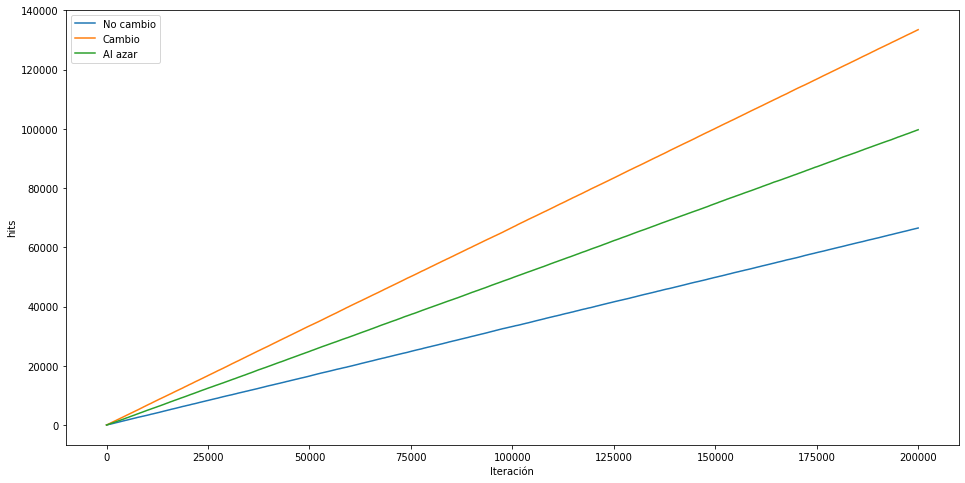

In [72]:
plt.figure(figsize=(16,8))
plt.plot(no_change_acum, label='No cambio')
plt.plot(change_acum, label='Cambio')
plt.plot(rand_sel_acum, label='Al azar')
plt.xlabel('Iteración')
plt.ylabel('hits')
plt.legend()
plt.show()